# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_country = city_weather["sys"]["country"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        description = city_weather['weather'][0]['description']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": description})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsiombe
Processing Record 2 of Set 1 | mhamid
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | gaigeturi
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | mae sot
Processing Record 9 of Set 1 | sechura
Processing Record 10 of Set 1 | todos santos
Processing Record 11 of Set 1 | egilsstadir
Processing Record 12 of Set 1 | kingston
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | zaragoza
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | abepura
Processing Record 17 of Set 1 | ristiina
Processing Record 18 of Set 1 | broome
Processing Record 19 of Set 1 | merizo village
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | thompson
Processing Record 23 of S

Processing Record 42 of Set 4 | thinadhoo
Processing Record 43 of Set 4 | kavaratti
Processing Record 44 of Set 4 | nar'yan-mar
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | puerto san jose
Processing Record 47 of Set 4 | prado
Processing Record 48 of Set 4 | taoudenni
Processing Record 49 of Set 4 | apac
Processing Record 0 of Set 5 | nantucket
Processing Record 1 of Set 5 | olonkinbyen
Processing Record 2 of Set 5 | sinabang
Processing Record 3 of Set 5 | trairi
Processing Record 4 of Set 5 | kenora
Processing Record 5 of Set 5 | santa ana
Processing Record 6 of Set 5 | aquiraz
Processing Record 7 of Set 5 | kambove
Processing Record 8 of Set 5 | rio gallegos
Processing Record 9 of Set 5 | kudahuvadhoo
Processing Record 10 of Set 5 | oum hadjer
Processing Record 11 of Set 5 | college
Processing Record 12 of Set 5 | takamaka
City not found. Skipping...
Processing Record 13 of Set 5 | uige
Processing Record 14 of Set 5 | taroa
Processing Record 15

Processing Record 32 of Set 8 | malvan
Processing Record 33 of Set 8 | wad az zaki
Processing Record 34 of Set 8 | ahvaz
Processing Record 35 of Set 8 | al jawf
Processing Record 36 of Set 8 | gondia
Processing Record 37 of Set 8 | kodinsk
Processing Record 38 of Set 8 | ola
Processing Record 39 of Set 8 | nizhnyaya poyma
Processing Record 40 of Set 8 | belmonte
Processing Record 41 of Set 8 | cole harbour
Processing Record 42 of Set 8 | lodwar
Processing Record 43 of Set 8 | levuka
Processing Record 44 of Set 8 | al muharraq
Processing Record 45 of Set 8 | taroudant
Processing Record 46 of Set 8 | cobourg
Processing Record 47 of Set 8 | ascension
Processing Record 48 of Set 8 | kurumkan
Processing Record 49 of Set 8 | utrik
Processing Record 0 of Set 9 | nemuro
Processing Record 1 of Set 9 | kencong
Processing Record 2 of Set 9 | katabu
Processing Record 3 of Set 9 | poso
Processing Record 4 of Set 9 | beira
Processing Record 5 of Set 9 | busan
Processing Record 6 of Set 9 | dubrovnik

Processing Record 22 of Set 12 | sitia
Processing Record 23 of Set 12 | dosso
Processing Record 24 of Set 12 | bodaybo
Processing Record 25 of Set 12 | heihe
Processing Record 26 of Set 12 | ishigaki
Processing Record 27 of Set 12 | suez
Processing Record 28 of Set 12 | sittwe
Processing Record 29 of Set 12 | baiti
Processing Record 30 of Set 12 | el granada
Processing Record 31 of Set 12 | vernon
Processing Record 32 of Set 12 | ambala
Processing Record 33 of Set 12 | yeniseysk
Processing Record 34 of Set 12 | flin flon
Processing Record 35 of Set 12 | la gi
Processing Record 36 of Set 12 | nalhati
Processing Record 37 of Set 12 | sabang
Processing Record 38 of Set 12 | kinana
Processing Record 39 of Set 12 | garachico
Processing Record 40 of Set 12 | bargara
City not found. Skipping...
Processing Record 41 of Set 12 | missoula
Processing Record 42 of Set 12 | vinhedo
Processing Record 43 of Set 12 | hilo
Processing Record 44 of Set 12 | borogontsy
Processing Record 45 of Set 12 | que

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tsiombe,-25.3000,45.4833,66.15,77,0,2.66,MG,clear sky
1,mhamid,29.8200,-5.7200,98.89,8,0,9.17,MA,clear sky
2,waitangi,-43.9535,-176.5597,50.83,96,94,1.99,NZ,overcast clouds
3,bredasdorp,-34.5322,20.0403,45.21,79,0,2.13,ZA,clear sky
4,gaigeturi,33.4644,126.3183,80.65,89,75,8.05,KR,broken clouds


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,66.15,77,0,2.66,MG,clear sky
1,mhamid,29.8200,-5.7200,98.89,8,0,9.17,MA,clear sky
2,waitangi,-43.9535,-176.5597,50.83,96,94,1.99,NZ,overcast clouds
3,bredasdorp,-34.5322,20.0403,45.21,79,0,2.13,ZA,clear sky
4,gaigeturi,33.4644,126.3183,80.65,89,75,8.05,KR,broken clouds


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
lat_column = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]

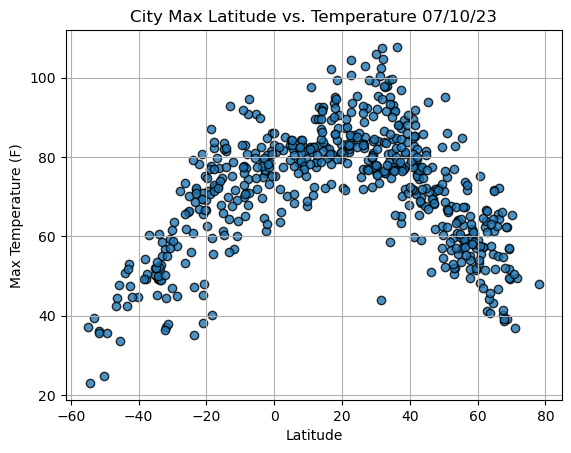

In [9]:
# Build scatter plot for latitude vs. temperature

plt.scatter(lat_column,
            max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature " +time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

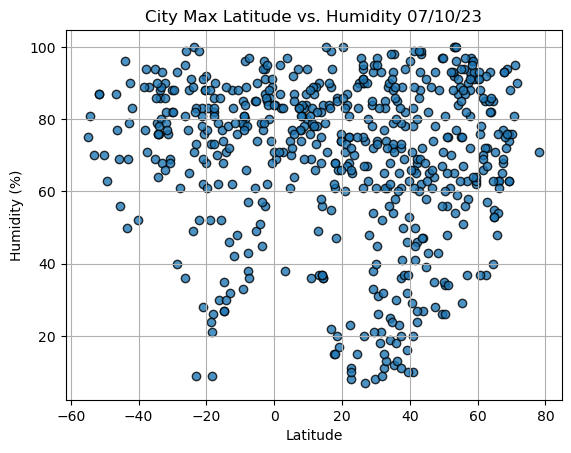

In [10]:
# Build the scatter plots for latitude vs. humidity
humid = city_data_df["Humidity"]
plt.scatter(lat_column,
            humid,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity " +time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

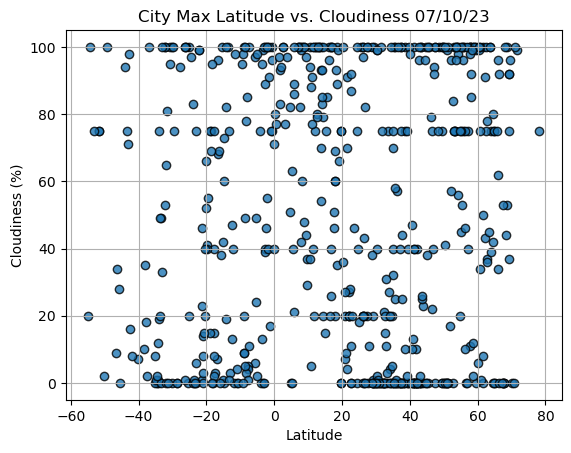

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(lat_column,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness " +time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

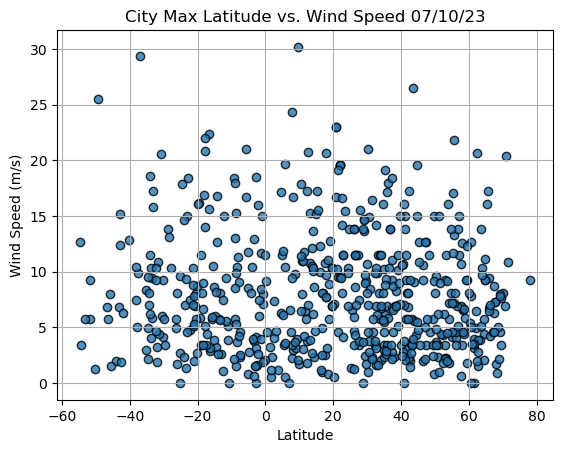

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
plt.scatter(lat_column,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed " +time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regress_plot(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mhamid,29.8200,-5.7200,98.89,8,0,9.17,MA,clear sky
4,gaigeturi,33.4644,126.3183,80.65,89,75,8.05,KR,broken clouds
5,talnakh,69.4865,88.3972,49.21,88,96,3.40,RU,overcast clouds
7,mae sot,16.7167,98.5667,73.18,99,100,1.01,TH,overcast clouds
9,todos santos,23.4500,-110.2167,85.44,70,46,15.43,MX,scattered clouds


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,66.15,77,0,2.66,MG,clear sky
2,waitangi,-43.9535,-176.5597,50.83,96,94,1.99,NZ,overcast clouds
3,bredasdorp,-34.5322,20.0403,45.21,79,0,2.13,ZA,clear sky
6,adamstown,-25.0660,-130.1015,70.14,65,100,9.60,PN,overcast clouds
8,sechura,-5.5569,-80.8222,80.89,61,6,16.75,PE,clear sky


###  Temperature vs. Latitude Linear Regression Plot

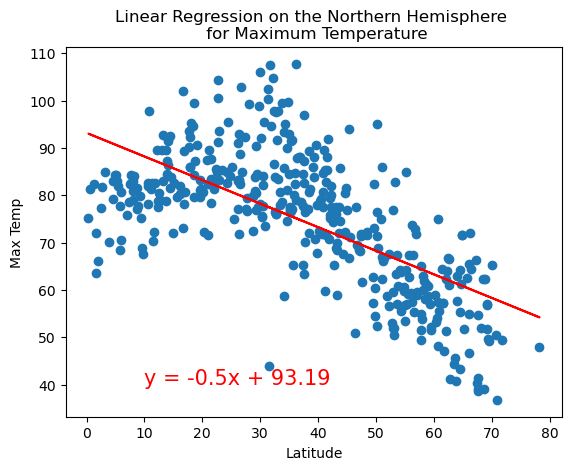

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regress_plot(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


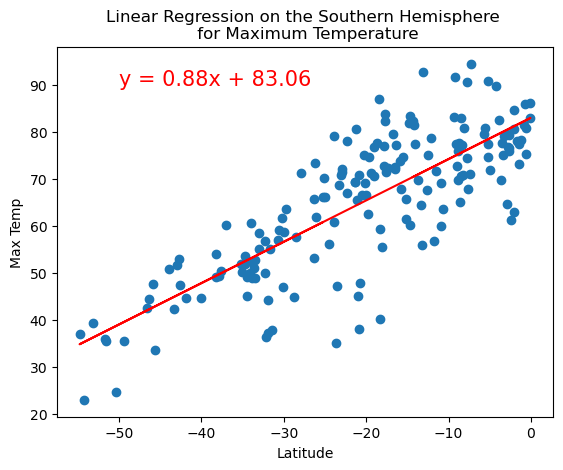

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regress_plot(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

**Discussion about the linear relationship:** The linear relationship is strong. The higher the latitude, the lower the temperature for both hemispheres. 

### Humidity vs. Latitude Linear Regression Plot

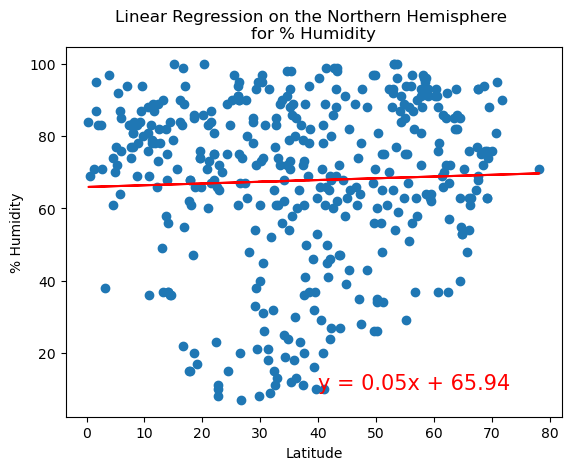

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regress_plot(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

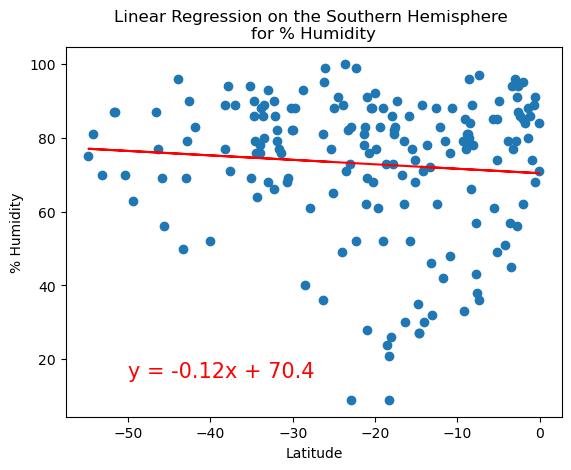

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

linear_regress_plot(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

**Discussion about the linear relationship:** The linear relationship for humidity is weak. It shows there is not much correlation between the northern or southern latitude for humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

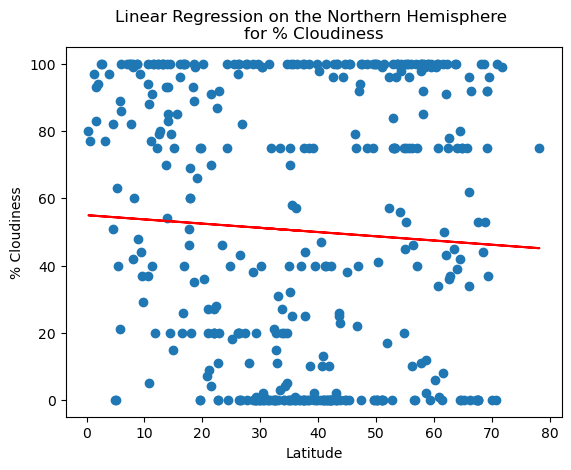

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regress_plot(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

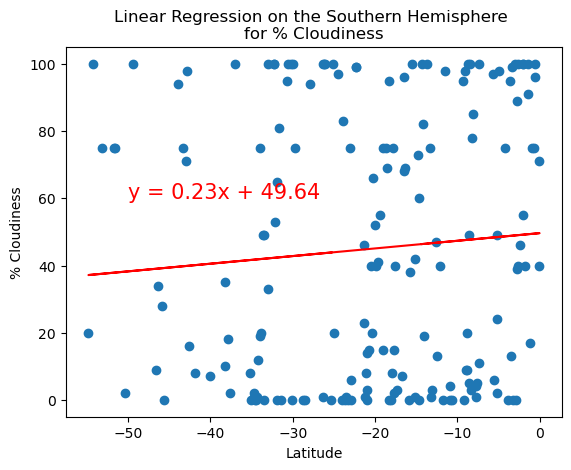

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regress_plot(x_values, y_values, 
                   'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

**Discussion about the linear relationship:** The cloudiness vs the latitude is also a weak correlation.

### Wind Speed vs. Latitude Linear Regression Plot

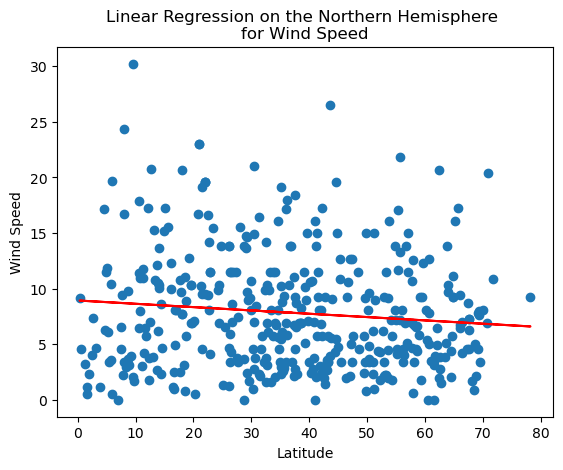

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

linear_regress_plot(x_values,y_values, 
                    'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

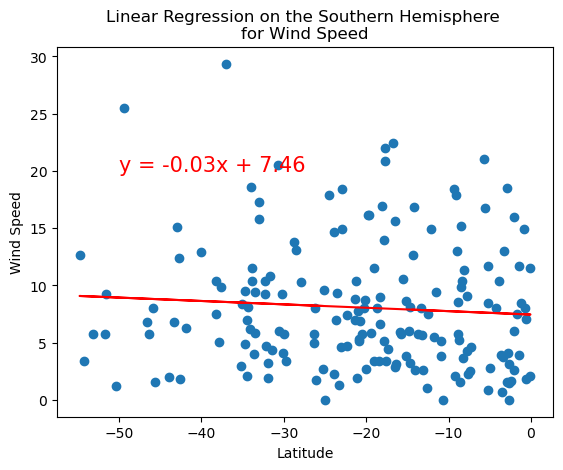

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regress_plot(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))

**Discussion about the linear relationship:** There seems to be a stronger correlation between the Northern Hemisphere and the wind speed. As far as the southern hemisphere, it seems more like a weak correlation. 